In [5]:
import sys
import json  
import os
current_path = os.getcwd()
data_folder = os.path.abspath(os.path.join(current_path, '..', 'data', 'external'))
data_filepath = os.path.join(data_folder, 'customer_segmentation.csv')

In [6]:
#it says that src is not found. Can you please go bak to the project root?
sys.path.append(os.path.abspath(os.path.join(current_path, '..')))

from src.data_preparation.cleaning import *
from src.data_preparation.rfm import *

######################################################
from src.clustering.kmeans.analysis import * 
from src.clustering.kmeans.core import *

######################################################
from src.clustering.agglomerative.analysis import *
from src.clustering.agglomerative.core import *
######################################################
from src.clustering.pca_methods.core import *
from src.clustering.pca_methods.insights import *
######################################################
from src.clustering.spectral.analysis import *
from src.clustering.spectral.core import *
######################################################
from src.descriptive_stats.insights import *
from src.descriptive_stats.stats import *
######################################################
from src.dimensionality_reduction.comparison import *
from src.dimensionality_reduction.pca import *
######################################################
from src.visualization.clustering_visualization import *
from src.visualization.data_visualization import *
###################################################### will be tested after 
from src.data_preparation.encoding import *






Testing:

           Recency  Monetary value    Frequency
count  1305.000000     1305.000000  1305.000000
mean     70.461303      207.529264     1.027586
std      42.465741      332.392388     0.172955
min       0.000000        2.180000     1.000000
25%      32.000000       67.050000     1.000000
50%      71.000000      123.330000     1.000000
75%     108.000000      223.350000     1.000000
max     365.000000     7274.880000     3.000000


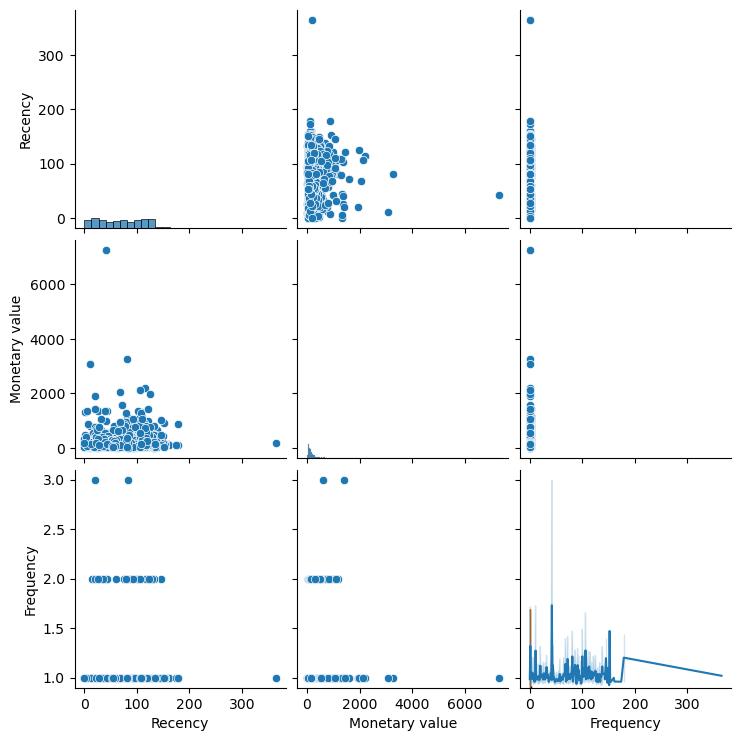

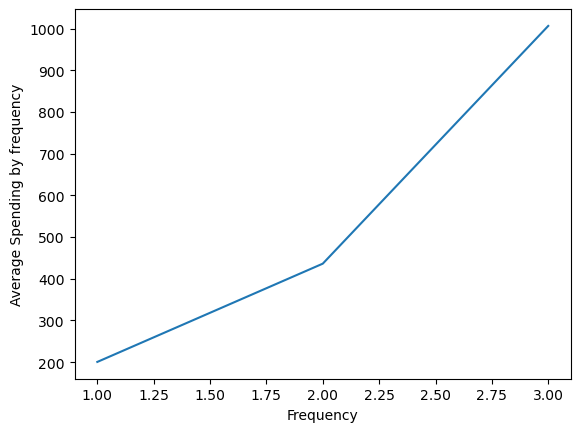

c:\Users\39339\Documents\University materials\University materials\Erasmus IE\DevOps\Devops_Project\Customer_Segmentation_DevOps\src\visualization\data_visualization.py:21: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




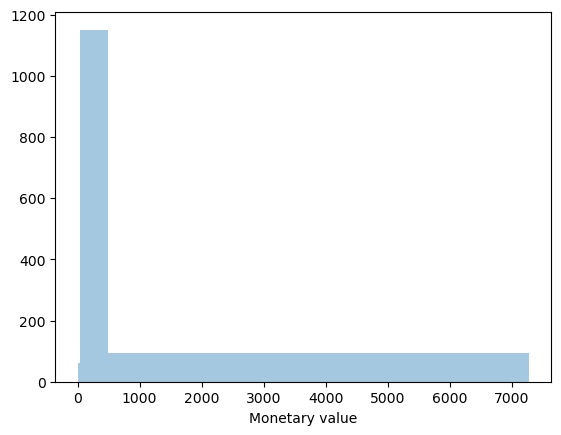

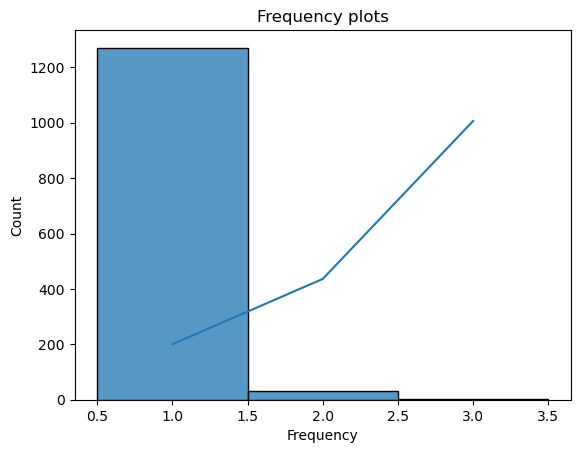

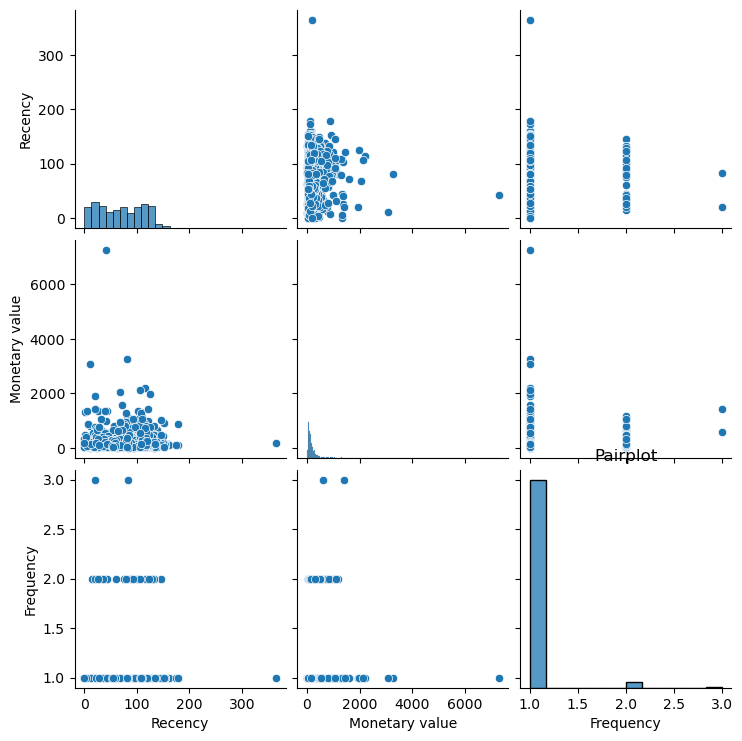

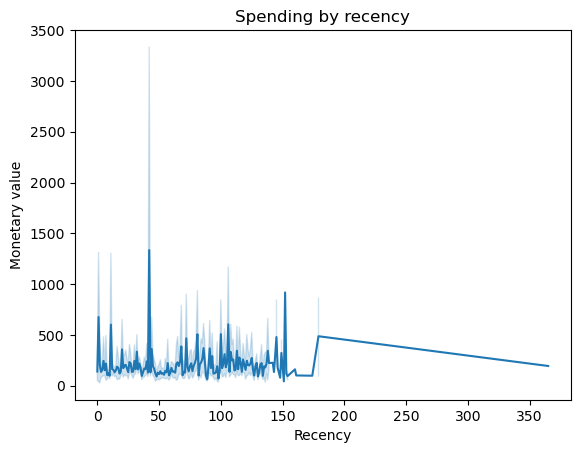

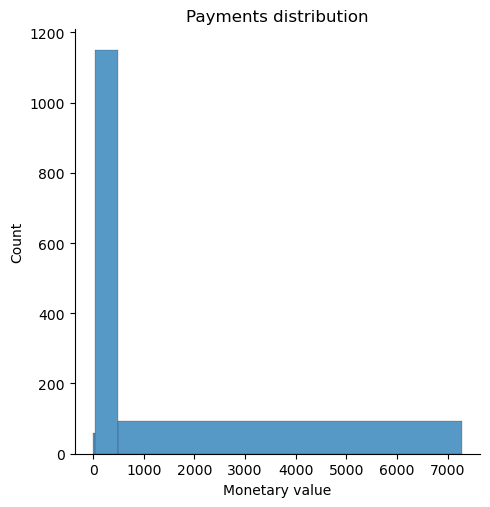

c:\Users\39339\anaconda3\envs\devops_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\39339\anaconda3\envs\devops_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\39339\anaconda3\envs\devops_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\39339\anaconda3\envs\devops_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\39339\anaconda3\envs\devops_env\Lib\sit

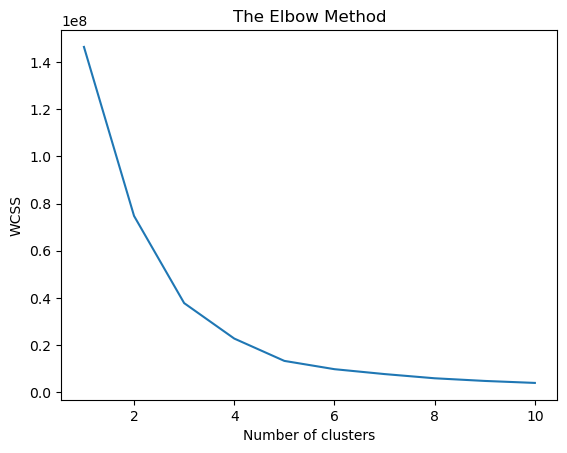

The top parameters to tune into Kmeans are: {'algorithm': 'lloyd', 'n_clusters': 5, 'n_init': 5}


The silhouette score for kmeans_cluster is: 0.8176868335253732


In [7]:
#df = prepare_data(r"C:\Users\39339\Documents\University materials\University materials\Erasmus IE\DevOps\Devops_Project\Customer_Segmentation_DevOps\data\external\customer_segmentation.csv")
#df = drop_columns(df)
df = prepare_data(data_filepath)
df = drop_c_id(df)
df = clean_data(df)

#RFM
frequency = get_frequencies(df)
monetary = get_monetary(df)
recency = get_recency(df)
rfm_dataset = concatenate_dataframes_(recency, monetary, frequency)


#initial stats and data visualization
describe_dataset(rfm_dataset)
#corr(rfm_dataset)
visualize_data(rfm_dataset)
plot_average_spending_by_frequency(rfm_dataset)
plot_payment_value_distribution(rfm_dataset)
freq(rfm_dataset)
pairplot(rfm_dataset)
spending_by_recency(rfm_dataset)
payments_distribution(rfm_dataset)

#kmeans
X = elbow_method(rfm_dataset)[0]
best_params = get_best_kmeans_params(X)

rfmcopy = choose(rfm_dataset,X)[0]
#number of clusters picked
nclusterskmeans = choose(rfm_dataset,X)[1]
plot_clusters(rfmcopy, clusters1=choose(rfm_dataset,X)[1])

silscores = {}
silscores['kmeans'] = silhouette_score_f(X, rfmcopy, 'kmeans_cluster')






Agglomerative and Spectral tests

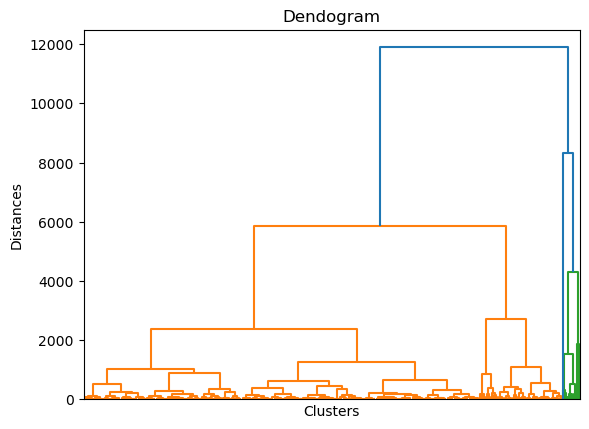

c:\Users\39339\anaconda3\envs\devops_env\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [8]:
Dend = dendogram(X)
y_hc = agglomerative_clustering(X, rfmcopy, nclusterskmeans)
plot_clusters(rfmcopy, clusters1= nclusterskmeans)
silscores['hierarchical clustering'] = silhouette_score(X, y_hc, metric='euclidean')
rfmcopy['hc_clusters'] = y_hc

### spectral tests
spectral = spectral_clustering(X)
sp = spectral_clustering(X)[0]
sil_score = spectral_clustering(X)[1]
rfmcopy['sp_clusters'] = sp
visualize_spectral_clusters(X, sp)

silscores['Spectral clustering'] = sil_score




Clusters summary

In [9]:
rfmcopy

,Customer ID,Recency,Monetary value,Frequency,kmeans_cluster,hc_clusters,sp_clusters
0,00674fe0f6a6f190bd022dbca99795dc,112,91.35,1,0,0,2
1,00f394e6fc446865ac4097b6db69ef4a,26,289.90,1,0,0,0
2,00f73459a4d3be97ff307dc869da0aa9,91,247.68,1,0,0,0
3,011b97b83f521e755f03173c96baf57b,101,92.39,1,0,0,2
4,011caa1d64812e93260454d6e311f330,10,142.82,1,0,0,1
...,...,...,...,...,...,...,...
1300,ff50bfb526a535449073de25d8703718,134,157.78,1,0,0,2
1301,ff99ec31eacd560b39d8ac9bc9b3e79d,53,71.44,1,0,0,1
1302,ffbd58aa41cbab07f08190801e939f59,28,103.02,1,0,0,1
1303,ffcdcb5ab4283658114e8077b9340a16,54,47.43,1,0,0,1


In [10]:
summ = cluster_summary(rfmcopy, 'Monetary value')
summ2 = cluster_summary(rfmcopy, 'Recency')
summ3 = cluster_summary(rfmcopy, 'Frequency')
print(summ)
print(summ2)
print(summ3)
print(kmeans_summary(rfmcopy, nclusterskmeans))

(                Clustersize  Total spending by cluster  \
kmeans_cluster                                           
0                      1236                  188329.38   
1                        68                   75221.43   
2                         1                    7274.88   

                Average spending by cluster  Average frequency by cluster  \
kmeans_cluster                                                              
0                                152.370049                      1.021036   
1                               1106.197500                      1.147059   
2                               7274.880000                      1.000000   

                Frequency std  Spending sd  
kmeans_cluster                              
0                    0.149095   119.177347  
1                    0.396428   516.964579  
2                         NaN          NaN  ,              Clustersize  Total spending by cluster  \
hc_clusters                              

PCA and Autoencoders

c:\Users\39339\anaconda3\envs\devops_env\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Monetary value                             0
Recency                                    0
Frequency                                  0
onehotencoder__payment_type_boleto         0
onehotencoder__payment_type_credit_card    0
                                          ..
onehotencoder__payment_installments_8      0
onehotencoder__payment_installments_9      0
onehotencoder__payment_installments_10     0
onehotencoder__payment_installments_12     0
onehotencoder__payment_installments_15     0
Length: 543, dtype: int64
(1305, 543)


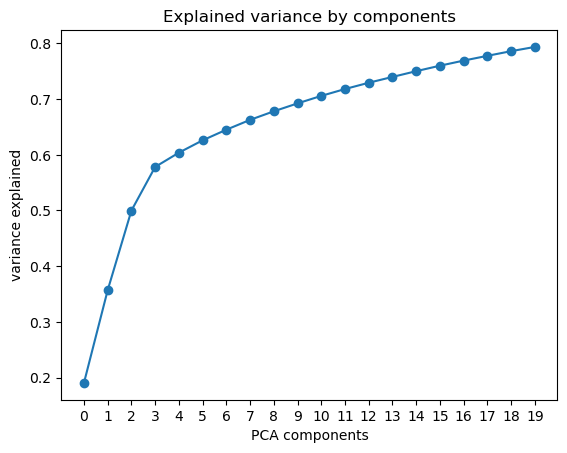

c:\Users\39339\anaconda3\envs\devops_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\39339\anaconda3\envs\devops_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\39339\anaconda3\envs\devops_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\39339\anaconda3\envs\devops_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\39339\anaconda3\envs\devops_env\Lib\sit

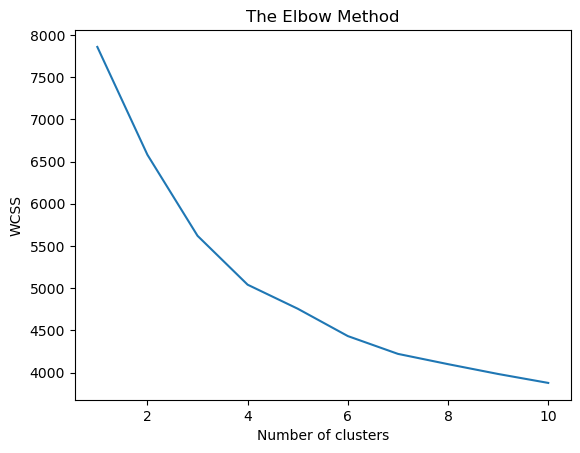

1305


c:\Users\39339\anaconda3\envs\devops_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



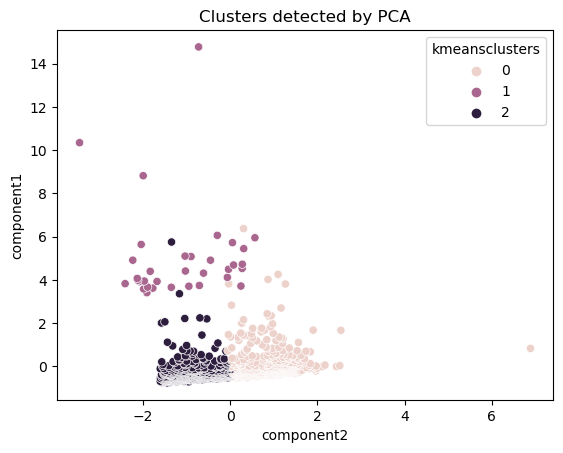

In [11]:
encode_df, newdf = encoding_PCA(df, rfm_dataset)
sc_features = pca_preprocessing(newdf)
X_ = pca_ncomponents(sc_features)
scores = pca(X_)
print(len(scores))  

segkmeans, kmeanspca = pca_kmeans(sc_features, scores, nclusterskmeans)
rfmcopy['pca_clusters'] = kmeanspca.labels_ 

dfpca = pca_components(segkmeans, kmeanspca, rfmcopy)
silscores['pca'] = silhouette_score(X_, kmeanspca.labels_ , metric='euclidean')

pca_insights(dfpca)
pca_insights2(df, dfpca)
plot_clusters_pca(dfpca, nclusterskmeans)


In [12]:
pd.DataFrame(silscores).head()

,kmeans,hierarchical clustering,Spectral clustering,pca
kmeans_cluster,0.817687,0.835082,0.319639,-0.009794


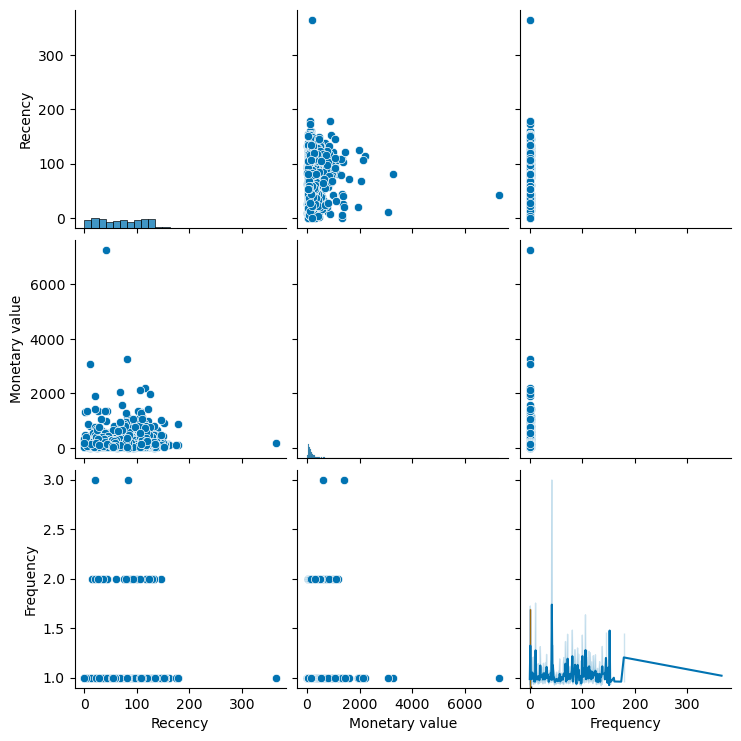

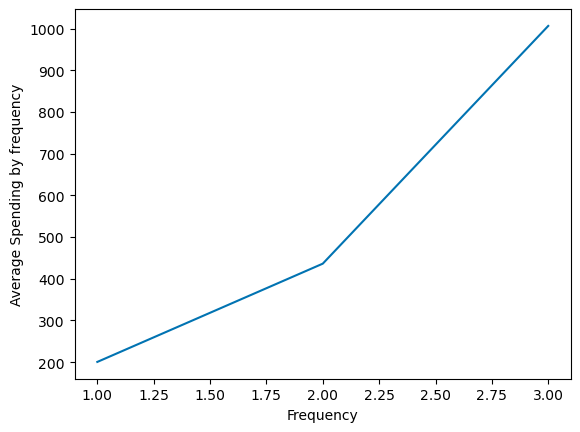

c:\Users\39339\Documents\University materials\University materials\Erasmus IE\DevOps\Devops_Project\Customer_Segmentation_DevOps\src\visualization\data_visualization.py:21: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




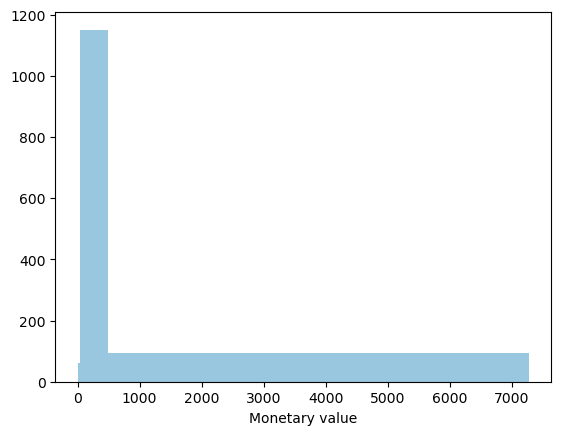


The payment distribution for the cluster made by cluster[0] of kmeans is
credit_card    936
boleto         220
voucher         47
debit_card      33
Name: payment_type, dtype: int64

The average installments made by customers in cluster[0] is 2.7803398058252426
---------------------------------

The payment distribution for the cluster made by cluster[1] of kmeans is
credit_card    51
boleto         15
debit_card      2
Name: payment_type, dtype: int64

The average installments made by customers in cluster[1] is 6.073529411764706
---------------------------------

The payment distribution for the cluster made by cluster[2] of kmeans is
boleto    1
Name: payment_type, dtype: int64

The average installments made by customers in cluster[2] is 1.0
---------------------------------

The payment distribution for the cluster made by cluster[3] of kmeans is
Series([], Name: payment_type, dtype: int64)

The average installments made by customers in cluster[3] is nan
---------------------------

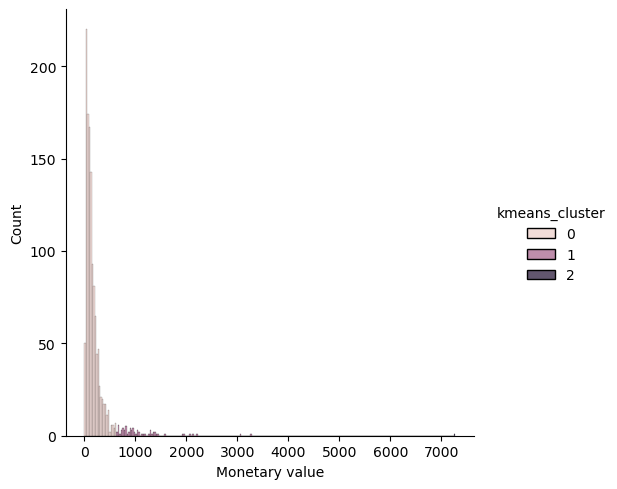

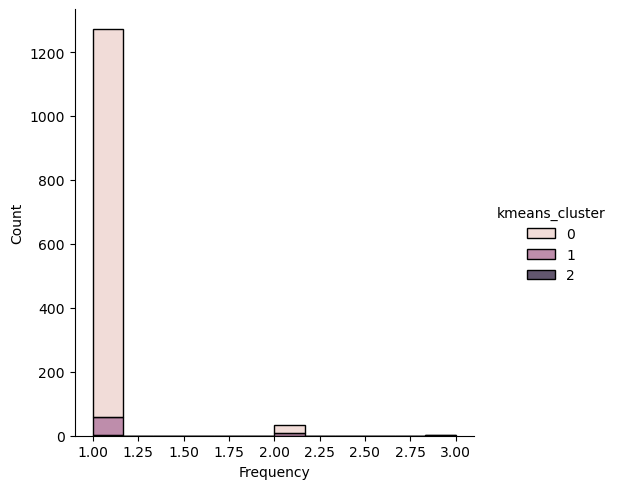

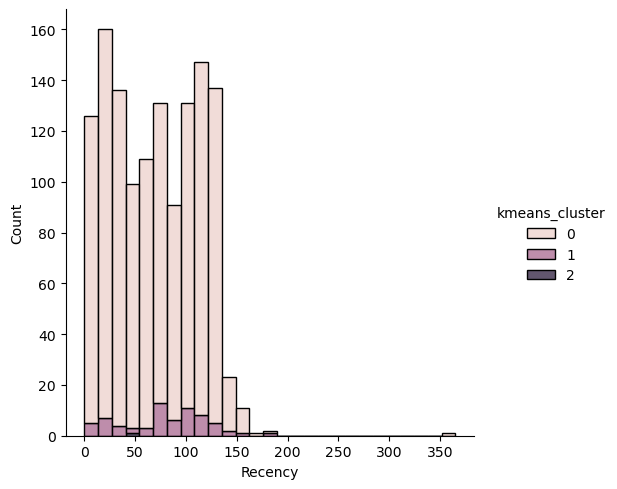

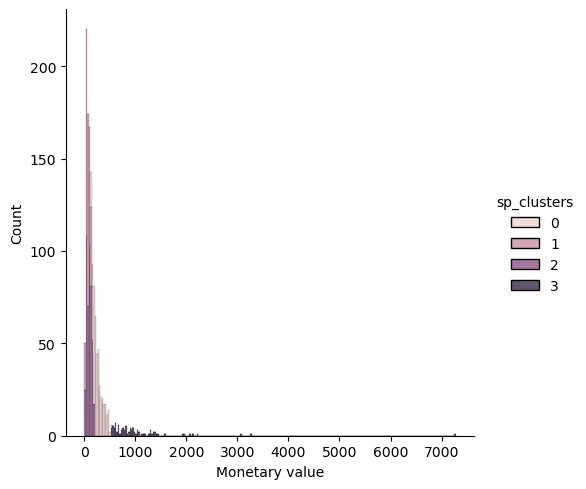

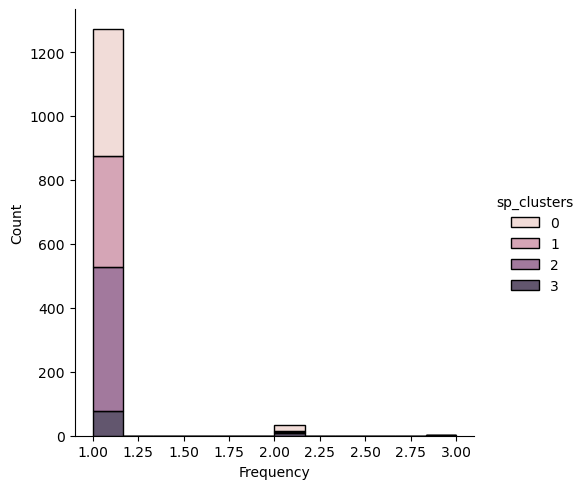

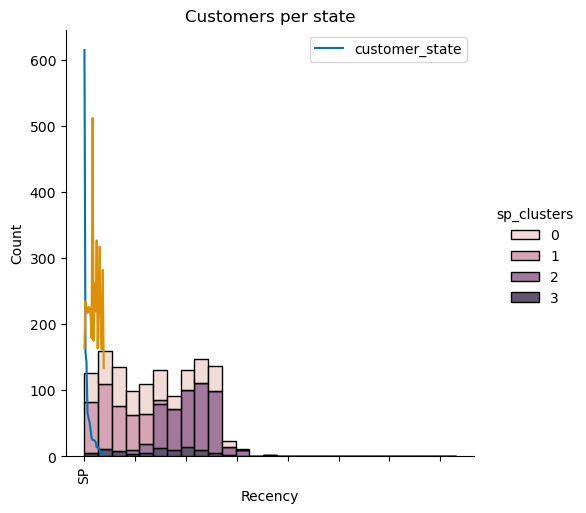

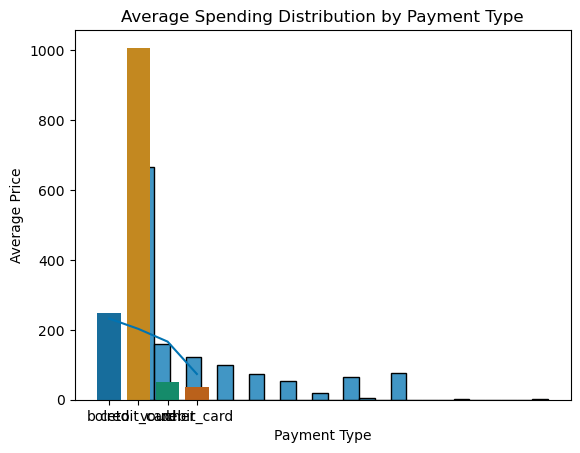

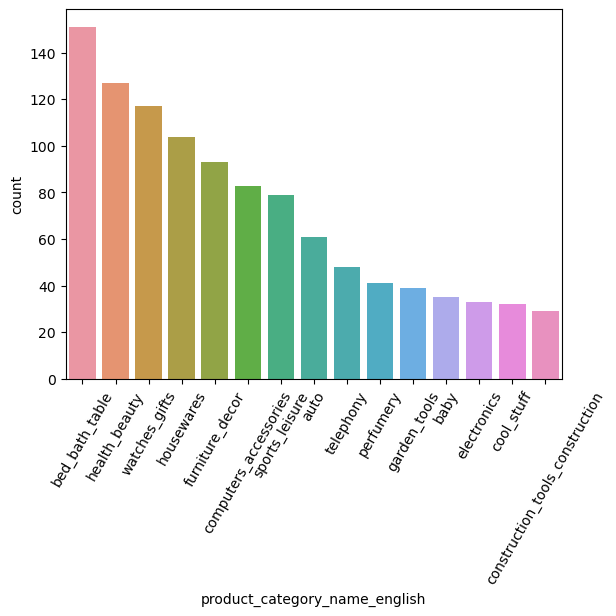

In [19]:
#visualization...
visualize_data(rfm_dataset)
plot_average_spending_by_frequency(rfm_dataset)
plot_payment_value_distribution(rfm_dataset)
segments_insights(rfmcopy)
paydf = installments_analysis(df, rfmcopy)
customers_insights(paydf) 
customer_geography(df)
payments_insights(df)
prod_insights(df)

In [11]:
rfmcopy

,Customer ID,Recency,Monetary value,Frequency,kmeans_cluster,hc_clusters,sp_clusters,pca_clusters
0,00674fe0f6a6f190bd022dbca99795dc,112,91.35,1,0,0,2,2
1,00f394e6fc446865ac4097b6db69ef4a,26,289.90,1,0,0,0,2
2,00f73459a4d3be97ff307dc869da0aa9,91,247.68,1,0,0,0,2
3,011b97b83f521e755f03173c96baf57b,101,92.39,1,0,0,2,2
4,011caa1d64812e93260454d6e311f330,10,142.82,1,0,0,1,2
...,...,...,...,...,...,...,...,...
1300,ff50bfb526a535449073de25d8703718,134,157.78,1,0,0,2,1
1301,ff99ec31eacd560b39d8ac9bc9b3e79d,53,71.44,1,0,0,1,0
1302,ffbd58aa41cbab07f08190801e939f59,28,103.02,1,0,0,1,1
1303,ffcdcb5ab4283658114e8077b9340a16,54,47.43,1,0,0,1,1
